In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np, pandas as pd
from glob import glob
import shutil, os
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.decomposition import IncrementalPCA
from tqdm.notebook import tqdm
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import pandas_profiling as pdp
from utils.losses import RMSE
import PIL.Image as Image
from pathlib import Path
import warnings
warnings.simplefilter('ignore')

In [3]:
class CONFIG:
    DATA_PATH = Path('../input/petfinder-pawpularity-score')
    OOF_PATH = Path('../output/3')

In [4]:
oof_df = pd.read_csv(CONFIG.OOF_PATH / 'oof_df.csv')

In [5]:
oof_df = oof_df.loc[:, ['Id', 'path', 'preds', 'Pawpularity']]

In [6]:
def get_result(result_df):
    metric = RMSE()
    preds = result_df["Pawpularity"].values
    labels = result_df["preds"].values
    score = metric(preds, labels)
    return score

In [7]:
def plot_histgram(ax, df, min_score, max_score):
    #確率密度関数を除き、ヒストグラムのみを描く
    mask = (min_score<df['Pawpularity']) & (df['Pawpularity']<max_score)
    ax.hist(df["Pawpularity"][mask], label = 'Pawpularity', range=(0,100), alpha=0.3, bins=50)
    ax.hist(df["preds"][mask],  label = 'preds', range=(0,100),alpha=0.3, bins=50)
    ax.legend()

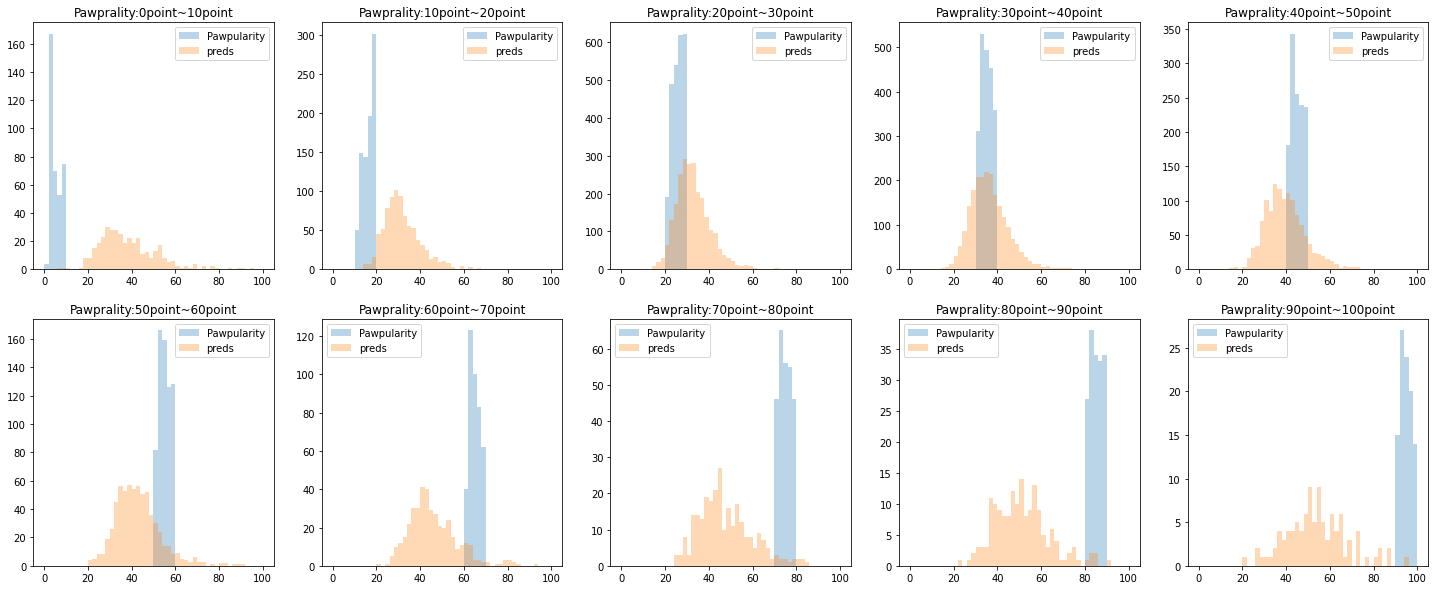

In [8]:
fig = plt.figure(figsize=(25,10))
for i, r in enumerate(range(0, 100, 10)):   
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(f"Pawprality:{r}point~{r+10}point")
    plot_histgram(ax, oof_df, r, r+10)
plt.show()

In [9]:
oof_df['dist']= oof_df['preds']-oof_df['Pawpularity']

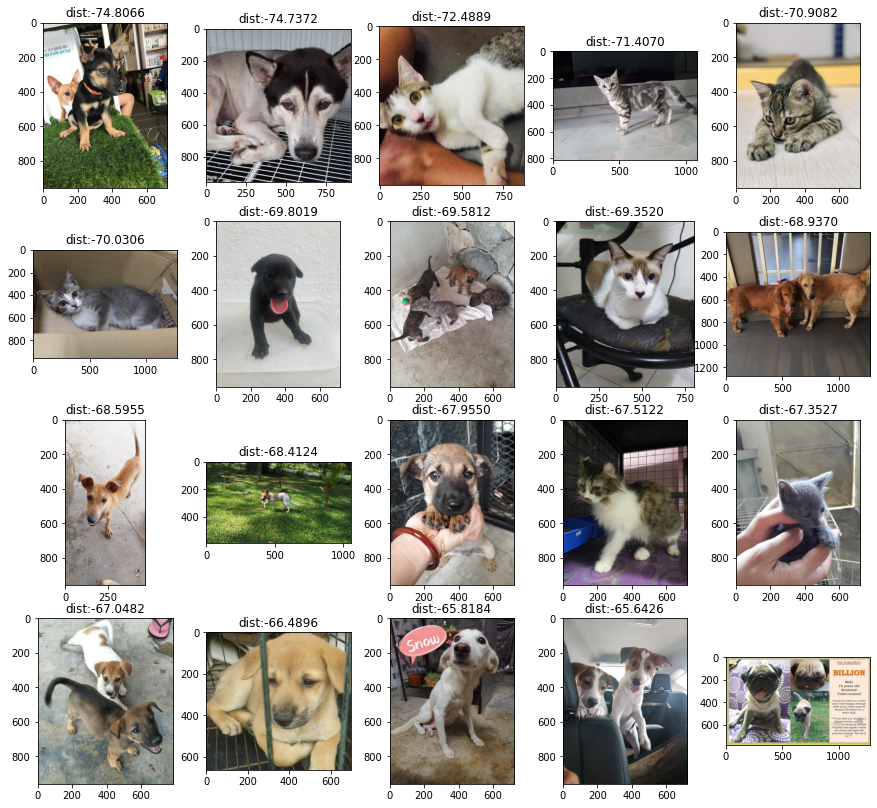

In [10]:
head_path = oof_df.sort_values('dist').head(20)['path']
head_score = oof_df.sort_values('dist').head(20)['dist']
figs = plt.figure(figsize=(15,14))
for idx, (image_id, score) in enumerate(zip(head_path,head_score)):
    ax.set_title(f"dist:{score:.04f}")
    ax = figs.add_subplot(4, 5, idx+1)
    ax.imshow(Image.open(image_id))

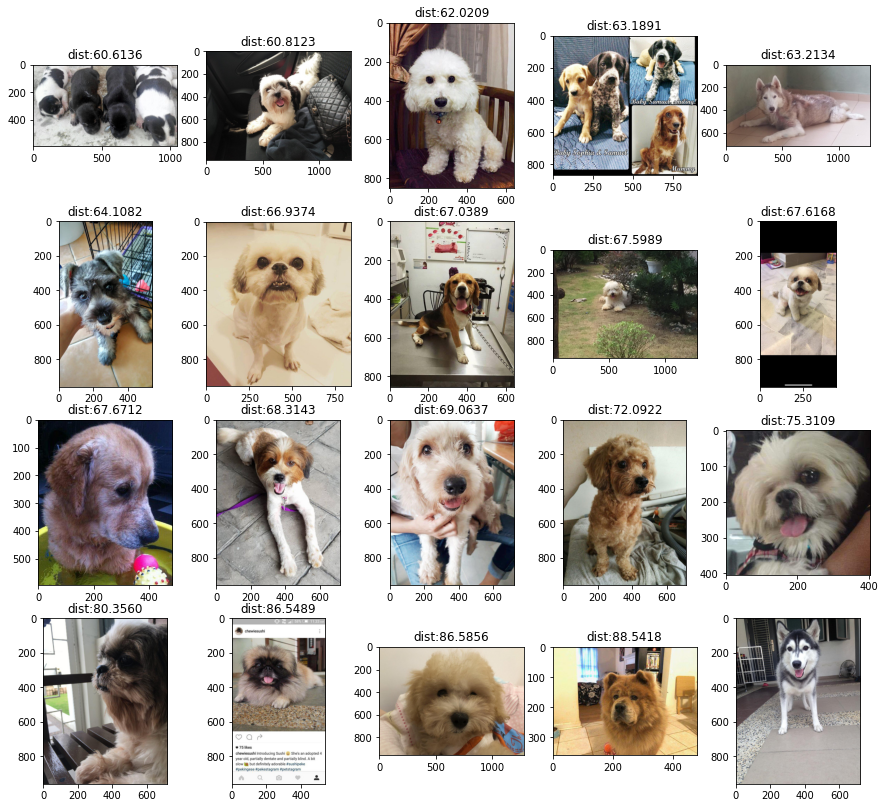

In [13]:
tail_path = oof_df.sort_values('dist').tail(20)['path']
tail_score = oof_df.sort_values('dist').tail(20)['dist']
figs = plt.figure(figsize=(15,14))
for idx, (image_id, score) in enumerate(zip(tail_path,tail_score)):
    ax.set_title(f"dist:{score:.04f}")
    ax = figs.add_subplot(4, 5, idx+1)
    ax.imshow(Image.open(image_id))

<AxesSubplot:xlabel='preds', ylabel='Pawpularity'>

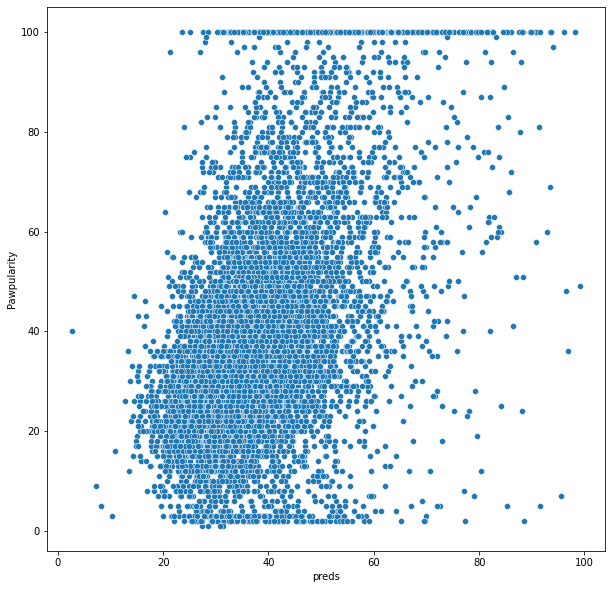

In [12]:
figs = plt.figure(figsize=(10,10))
sns.scatterplot(data=oof_df, x='preds', y='Pawpularity')